In [20]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

#https://api.darksky.net/forecast/[key]/[latitude],[longitude]

import requests

berlin = [52.520008, 13.404954]

with open("./data/DarkSkyAPIkey.txt", "r") as f:
    key = f.readline()


r = requests.get('https://api.darksky.net/forecast/%s/%d,%d,2017-11-20T00:00:00Z?units=si' % (key,berlin[0],berlin[1]))

print (r.status_code)
print (r.headers['content-type'])

data = r.json()

200
application/json; charset=utf-8


In [51]:
import time

today = time.strftime("%d")
startday = int(today)-14
wind = []


In [61]:
day = 3
if day<10:
    day = {"0"+str(day)}
print(day)

{'03'}


In [71]:
day = 10
for i in range(0,14):
    r = requests.get('https://api.darksky.net/forecast/%s/%d,%d,2017-11-%sT00:00:00Z?units=si' % (key,berlin[0],berlin[1], day+i))
    print (r.status_code)
    data = r.json()
    for d in data['hourly']['data']:
        wind.append(d['windSpeed'])

200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [105]:
import numpy as np
wind_np = np.fromiter(wind, np.float)
print(wind_np)

[ 3.16  3.84  4.28  5.16  4.82  5.05  5.25  5.32  5.06  5.14  5.28  5.66
  6.69  6.11  6.1   6.19  6.61  7.22  7.35  6.39  6.08  6.6   6.89  6.77
  3.16  3.84  4.28  5.16  4.82  5.05  5.25  5.32  5.06  5.14  5.28  5.66
  6.69  6.11  6.1   6.19  6.61  7.22  7.35  6.39  6.08  6.6   6.89  6.77
  5.09  5.64  5.85  6.12  5.95  5.8   5.6   6.35  6.47  6.91  6.61  6.93
  6.66  6.87  5.72  6.09  4.81  5.23  3.98  4.45  4.32  4.41  3.94  4.28
  3.78  3.85  3.83  3.99  3.31  2.32  2.74  2.72  2.11  3.15  2.74  2.83
  3.02  2.67  2.83  2.32  1.13  1.14  0.86  0.59  0.71  1.1   1.74  2.21
  1.97  1.63  1.81  2.08  2.35  2.57  2.47  2.44  2.81  3.83  3.    3.58
  3.9   3.61  4.17  3.96  3.47  3.25  3.4   3.45  3.46  2.68  2.24  2.36
  1.58  1.92  1.86  1.81  1.44  1.95  1.44  2.01  1.98  2.93  2.95  3.84
  4.17  4.09  4.73  4.33  4.2   4.65  4.88  5.58  5.62  5.    4.68  4.34
  4.18  3.29  3.26  3.24  2.62  3.1   2.9   3.13  3.24  3.07  3.52  3.91
  3.86  4.35  3.83  3.14  2.56  1.84  2.14  2.47  2

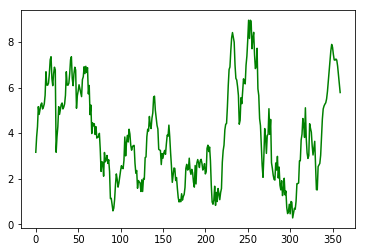

In [117]:
import matplotlib.pyplot as plt
plt.plot(wind_np, '-g')
plt.show()

In [108]:
windmax = wind_np.argmax()
print(windmax)
print(wind_np[251])

251
8.95


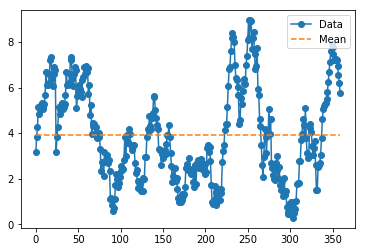

In [119]:
# Calculate the simple average of the data
w_mean = [np.mean(wind_np)]*len(wind_np)

fig,ax = plt.subplots()

# Plot the data
data_line = ax.plot(wind_np, label='Data', marker='o')

# Plot the average line
mean_line = ax.plot(w_mean, label='Mean', linestyle='--')

# Make a legend
legend = ax.legend(loc='upper right')

plt.show()

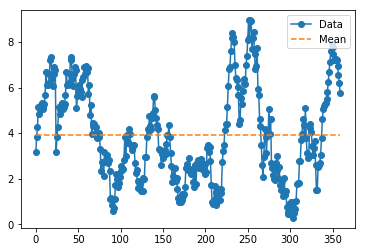

In [124]:
w_avg = [np.average(wind_np)]*len(wind_np)

fig,ax = plt.subplots()

# Plot the data
data_line = ax.plot(wind_np, label='Data', marker='o')

# Plot the average line
avg_line = ax.plot(w_avg, label='Mean', linestyle='--')

# Make a legend
legend = ax.legend(loc='upper right')

plt.show()